In [60]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.utils import resample

In [61]:
#Read the dataset
df = pd.read_csv('Station-data-for-ML.csv')
df1 = df.copy(deep=True)
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'] = df['datetime'].astype(object)
df.shape

(49323, 7)

In [62]:
df.head()

,datetime,station_name,rain_fall,temperature,humidity,wind_speed,wind_direction
0,2016-01-15 00:00:00,QuangNgai,0.6,23.0,93.0,4.0,0.0
1,2016-01-15 01:00:00,QuangNgai,0.0,20.7,94.0,4.0,4.0
2,2016-01-15 02:00:00,QuangNgai,0.0,19.8,94.0,4.0,18.0
3,2016-01-15 03:00:00,QuangNgai,0.0,22.2,93.0,4.0,31.0
4,2016-01-15 04:00:00,QuangNgai,1.0,23.2,94.0,4.0,44.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49323 entries, 0 to 49322
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        49323 non-null  object 
 1   station_name    49323 non-null  object 
 2   rain_fall       48067 non-null  float64
 3   temperature     49323 non-null  float64
 4   humidity        49323 non-null  float64
 5   wind_speed      49321 non-null  float64
 6   wind_direction  49323 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.6+ MB


In [64]:
# create a table with data missing 
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
datetime,0,0.000000,object
station_name,0,0.000000,object
rain_fall,1256,2.546479,float64
temperature,0,0.000000,float64
humidity,0,0.000000,float64
wind_speed,2,0.004055,float64
wind_direction,0,0.000000,float64


In [65]:
#Check Duplicate Values
df.duplicated().sum()

0

In [66]:
#Check unique values
df.nunique()

datetime          16441
station_name          3
rain_fall           525
temperature         244
humidity             56
wind_speed           18
wind_direction      361
dtype: int64

In [67]:
# Định nghĩa hàm để chuyển đổi độ sang hướng
def degrees_to_direction(degrees):
    if degrees >= 0 and degrees < 22.5 or degrees >= 337.5 and degrees <= 360:
        return 'N'
    elif degrees >= 22.5 and degrees < 45:
        return 'NNE'
    elif degrees >= 45 and degrees < 67.5:
        return 'NE'
    elif degrees >= 67.5 and degrees < 90:
        return 'ENE'
    elif degrees >= 90 and degrees < 112.5:
        return 'E'
    elif degrees >= 112.5 and degrees < 135:
        return 'ESE'
    elif degrees >= 135 and degrees < 157.5:
        return 'SE'
    elif degrees >= 157.5 and degrees < 180:
        return 'SSE'
    elif degrees >= 180 and degrees < 202.5:
        return 'S'
    elif degrees >= 202.5 and degrees < 225:
        return 'SSW'
    elif degrees >= 225 and degrees < 247.5:
        return 'SW'
    elif degrees >= 247.5 and degrees < 270:
        return 'WSW'
    elif degrees >= 270 and degrees < 292.5:
        return 'W'
    elif degrees >= 292.5 and degrees < 315:
        return 'WNW'
    elif degrees >= 315 and degrees < 337.5:
        return 'NW'
    elif degrees >= 337.5 and degrees < 360:
        return 'NNW'

# Áp dụng hàm chuyển đổi cho cột 'wind_direction'
df['wind_direction'] = df['wind_direction'].apply(degrees_to_direction)

# Hiển thị DataFrame sau khi chuyển đổi
df.head()

,datetime,station_name,rain_fall,temperature,humidity,wind_speed,wind_direction
0,2016-01-15 00:00:00,QuangNgai,0.6,23.0,93.0,4.0,N
1,2016-01-15 01:00:00,QuangNgai,0.0,20.7,94.0,4.0,N
2,2016-01-15 02:00:00,QuangNgai,0.0,19.8,94.0,4.0,N
3,2016-01-15 03:00:00,QuangNgai,0.0,22.2,93.0,4.0,NNE
4,2016-01-15 04:00:00,QuangNgai,1.0,23.2,94.0,4.0,NNE


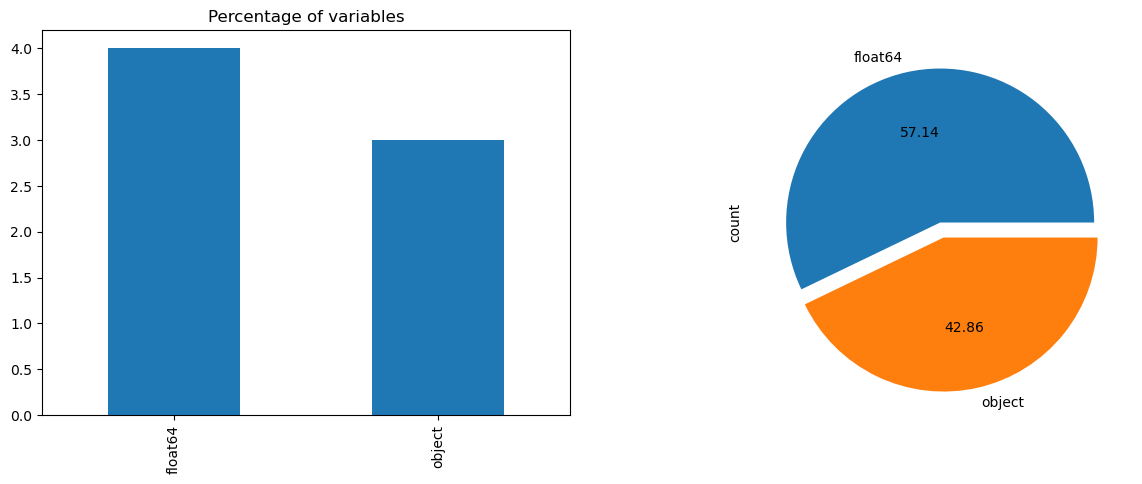

In [68]:
# Percetage of categorical and numerical columns in the dataset
cat_cols = list(df.select_dtypes(include='object').columns)
num_cols = list(df.select_dtypes(exclude='object').columns)

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax1 = plt.subplot(1,2,1)
plt.title('Percentage of variables', loc='center')
df.dtypes.value_counts().plot(kind='bar')

ax2 = plt.subplot(1,2,2)
df.dtypes.value_counts().plot(kind='pie', autopct='%0.2f', ax=ax2, explode=[0,0.1])
plt.show()

In [69]:
print('Categorical columns are :\n', cat_cols)
print()
print('Numerical columns are :\n', num_cols)

Categorical columns are :
 ['datetime', 'station_name', 'wind_direction']

Numerical columns are :
 ['rain_fall', 'temperature', 'humidity', 'wind_speed']


In [70]:
# Five point summary for numrerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rain_fall,48067.0,2.663235,9.329759,0.0,0.0,0.0,0.6,371.0
temperature,49323.0,27.130984,4.009831,15.3,24.5,26.8,29.6,40.2
humidity,49323.0,87.820652,8.893067,44.0,83.0,91.0,95.0,100.0
wind_speed,49321.0,2.482046,1.811965,0.0,1.0,2.0,3.0,18.0


In [71]:
# Five point summary for categorical variables
df.describe(include='object').T

,count,unique,top,freq
datetime,49323,16441,2016-01-15 00:00:00,3
station_name,49323,3,QuangNgai,16441
wind_direction,49323,15,N,6142


C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_14600\1454617110.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rain_fall'])


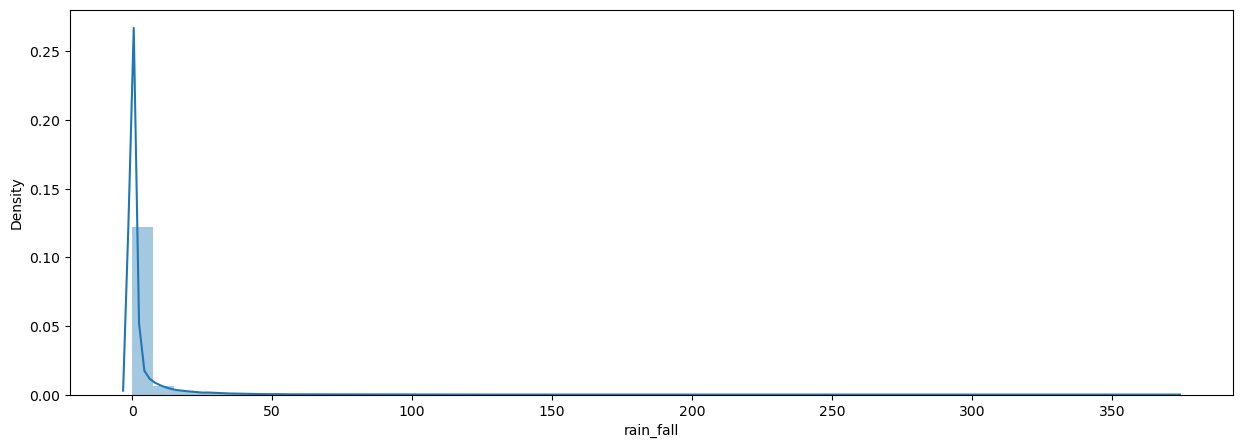

In [72]:
# Distribution of Rainfall
plt.figure(figsize=(15,5))
sns.distplot(df['rain_fall'])
plt.show()

C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_14600\956943431.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temperature'],  bins=25)


<Axes: title={'center': 'Temperature Distribution'}, xlabel='temperature', ylabel='Density'>

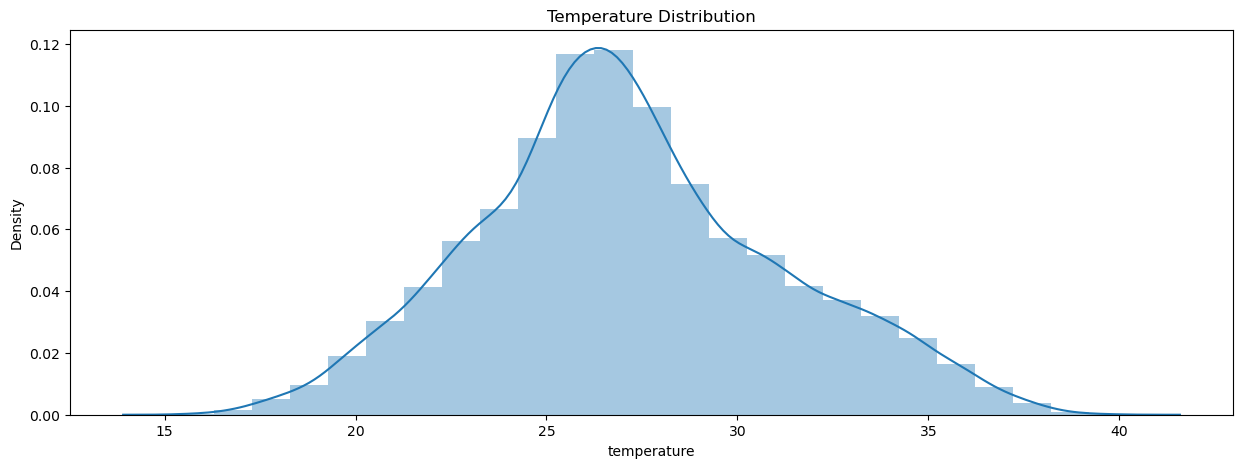

In [73]:
fig, ax = plt.subplots(figsize=(15,5))
plt.title('Temperature Distribution')
sns.distplot(df['temperature'],  bins=25)

C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_14600\1686268286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


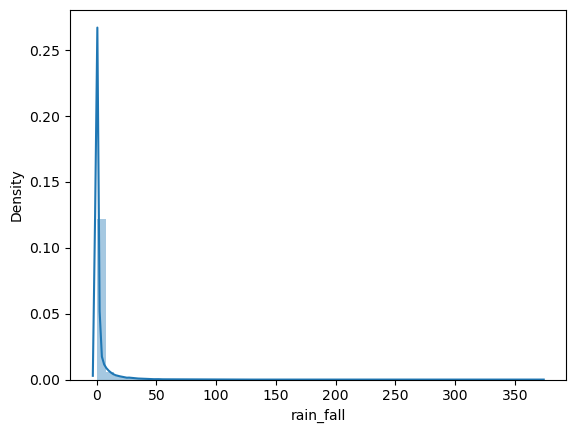

C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_14600\1686268286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


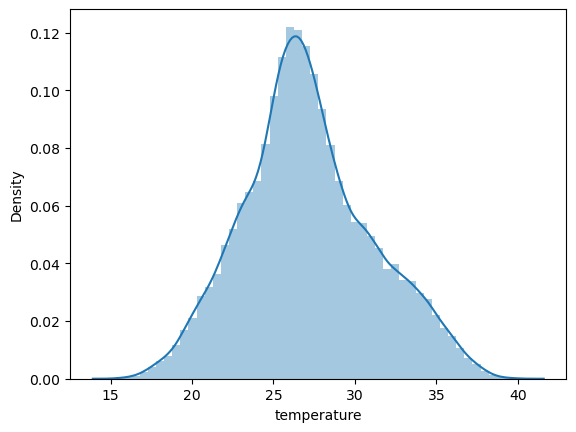

C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_14600\1686268286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


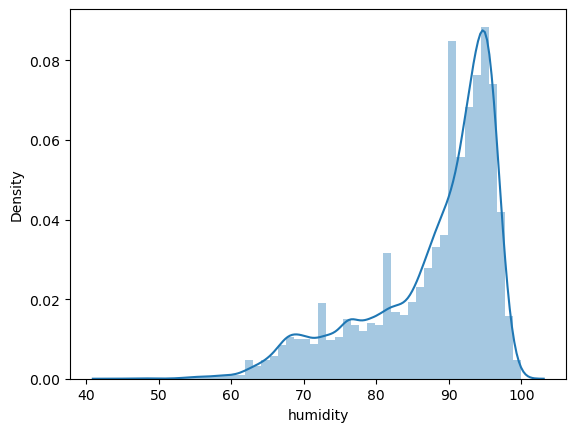

C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_14600\1686268286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


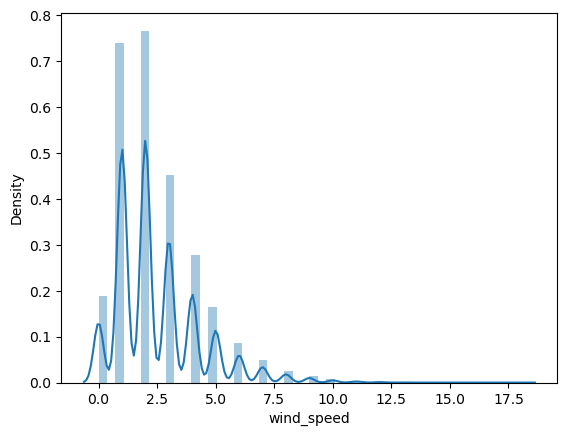

In [74]:
# Distribution plots for numerical variables
for col in num_cols:
    sns.distplot(df[col])
    plt.show()

In [75]:
# Unique locations and its name
print('Number of stations :', len(df['station_name'].unique()))
df['station_name'].unique()

Number of stations : 3


array(['QuangNgai', 'TraKhuc', 'AnChi'], dtype=object)

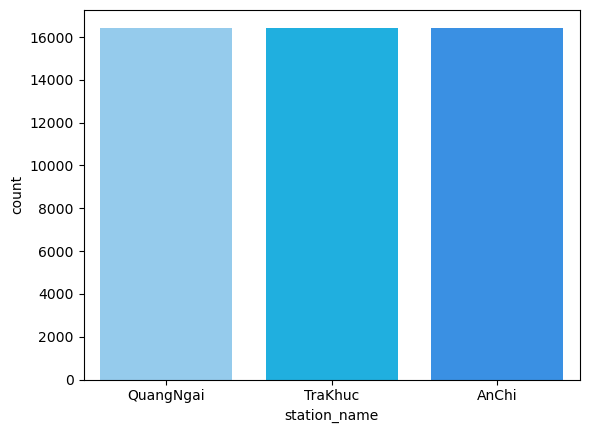

In [76]:
# Number of observations for each station
sns.countplot(x=df['station_name'],palette=["#87CEFA","#00BFFF","#1E90FF"])
plt.show()

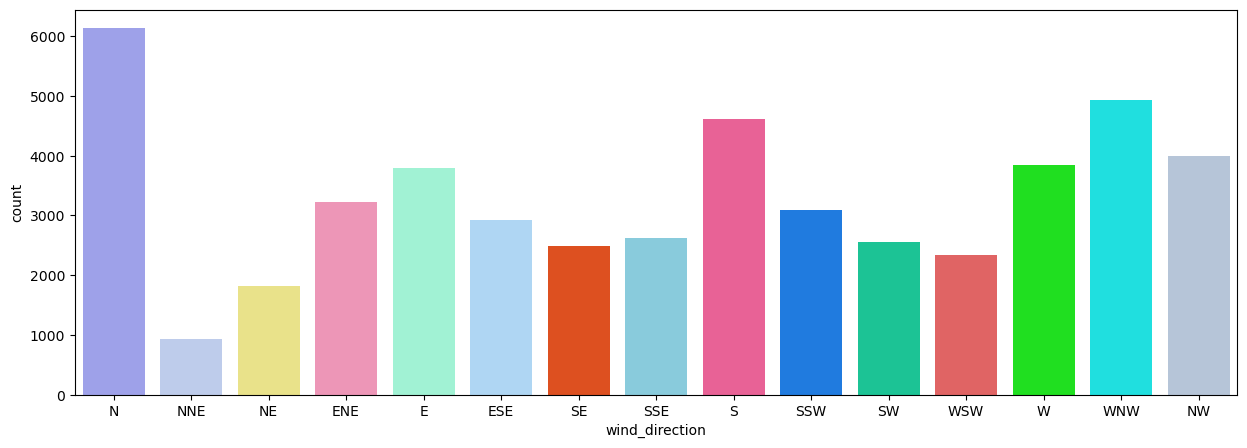

In [77]:
# Count plot for wind_direction
plt.figure(figsize=(15,5))
sns.countplot(x=df['wind_direction'], palette=["#9195F6","#B7C9F2","#F9F07A","#FB88B4","#94FFD8","#A3D8FF","#FC4100","#7BD3EA","#FF4B91","#0079FF","#00DFA2","#F45050","#00FF00","#00FFFF","#B0C4DE","#708090"])
plt.show()

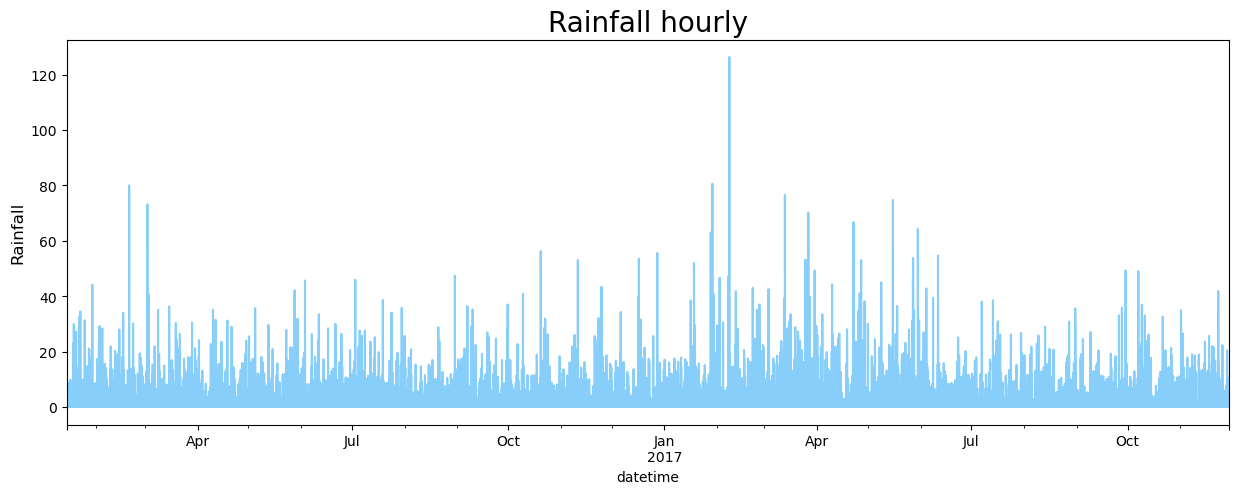

In [78]:
# Average rainfall based on month and day
plt.figure(figsize=(15,5))
df.groupby(by=['datetime'])['rain_fall'].mean().plot(color = "#87CEFA")
plt.title('Rainfall hourly', fontsize=20)
plt.ylabel('Rainfall', fontsize=12)
plt.show()

In [79]:
# Average rainfall data
df.groupby(by=['datetime'])[['rain_fall']].mean().T

datetime,2016-01-15 00:00:00,2016-01-15 01:00:00,2016-01-15 02:00:00,2016-01-15 03:00:00,2016-01-15 04:00:00,2016-01-15 05:00:00,2016-01-15 06:00:00,2016-01-15 07:00:00,2016-01-15 08:00:00,2016-01-15 09:00:00,...,2017-11-29 15:00:00,2017-11-29 16:00:00,2017-11-29 17:00:00,2017-11-29 18:00:00,2017-11-29 19:00:00,2017-11-29 20:00:00,2017-11-29 21:00:00,2017-11-29 22:00:00,2017-11-29 23:00:00,2017-11-30 00:00:00
rain_fall,1.4,0.066667,0.0,0.0,0.333333,0.066667,0.266667,0.0,0.0,0.466667,...,0.0,3.066667,4.266667,1.0,0.066667,3.6,5.333333,1.066667,10.6,1.933333


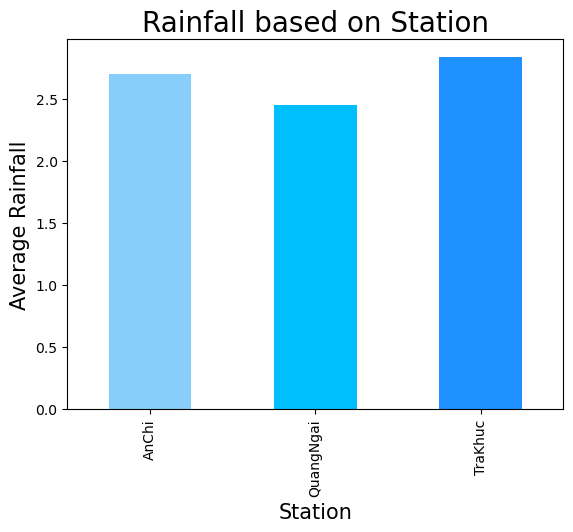

In [80]:

# Average rainfall based on location
df.groupby(by=['station_name'])['rain_fall'].mean().plot(kind='bar', color=["#87CEFA","#00BFFF","#1E90FF"])
plt.title('Rainfall based on Station', fontsize=20)
plt.ylabel('Average Rainfall', fontsize=15)
plt.xlabel('Station', fontsize=15)
plt.show()

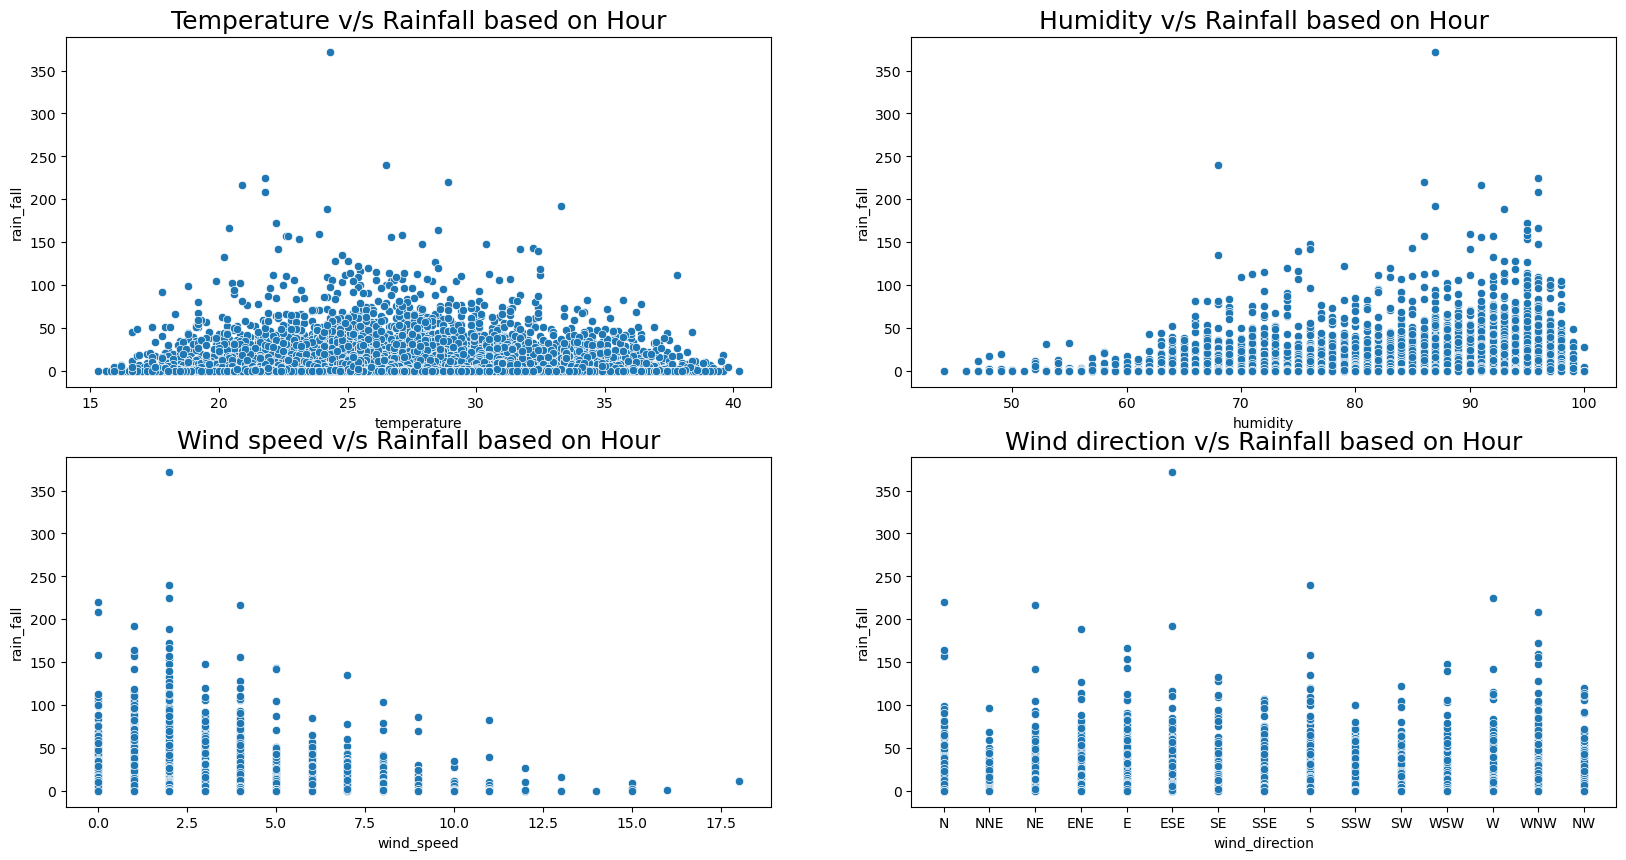

In [81]:
# Wind direction at different timespan
fig, ax = plt.subplots(2, 2, figsize=(20,10))

ax1 = plt.subplot(2, 2, 1)
plt.title('Temperature v/s Rainfall based on Hour', fontsize=18)
sns.scatterplot(data=df, x='temperature', y='rain_fall', ax=ax1)

ax2 = plt.subplot(2, 2, 2)
plt.title('Humidity v/s Rainfall based on Hour', fontsize=18)
sns.scatterplot(data=df, x='humidity', y='rain_fall', ax=ax2)

ax3 = plt.subplot(2, 2, 3)
plt.title('Wind speed v/s Rainfall based on Hour', fontsize=18)
sns.scatterplot(data=df, x='wind_speed', y='rain_fall', ax=ax3)

ax4 = plt.subplot(2, 2, 4)
plt.title('Wind direction v/s Rainfall based on Hour', fontsize=18)
sns.scatterplot(data=df, x='wind_direction', y='rain_fall', ax=ax4)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


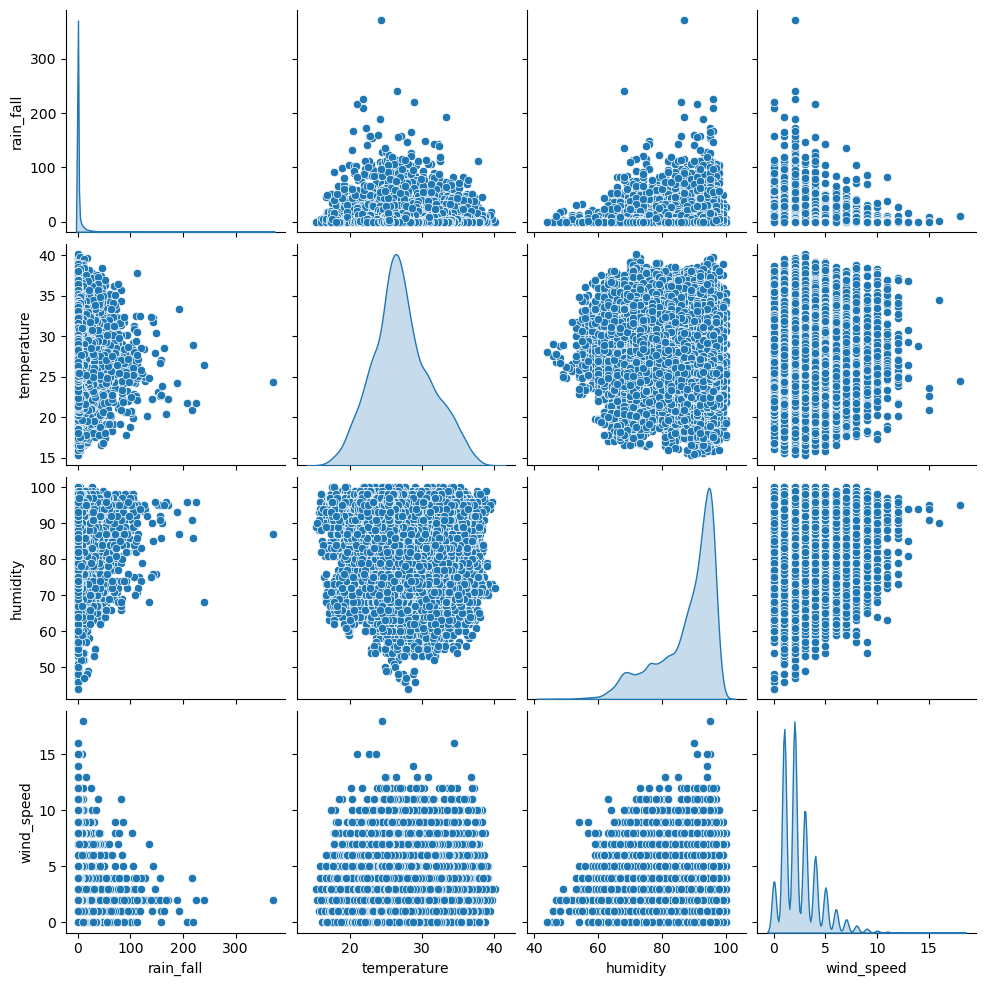

In [82]:
# Relation between all the variables
sns.pairplot((df.drop(columns=['datetime'], axis=1)), diag_kind='kde')
plt.show()

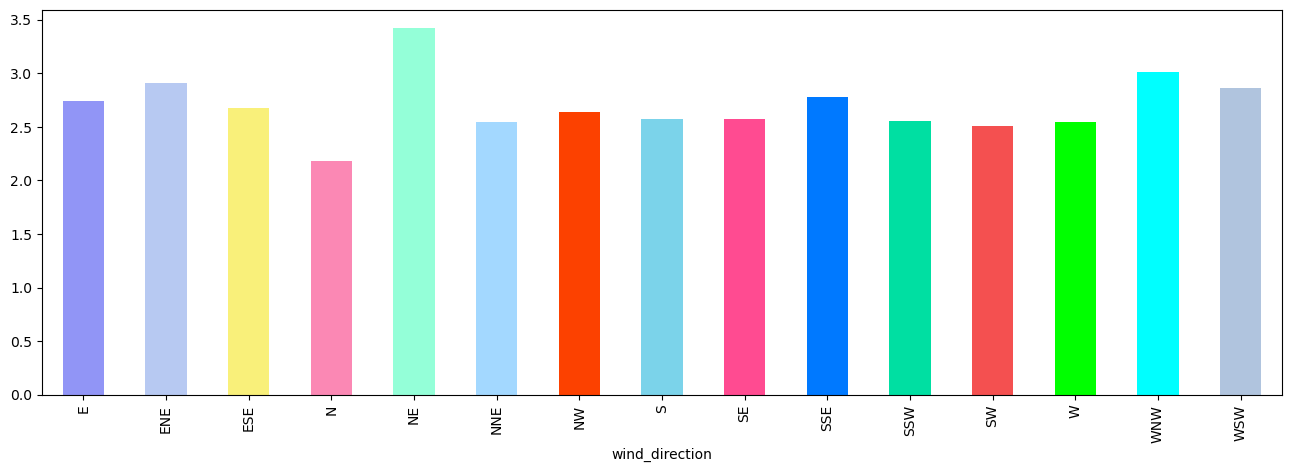

In [83]:
# Avg. rainfall based on wind direction
plt.figure(figsize=(16,5))
df.groupby(by=['wind_direction'])['rain_fall'].mean().plot(kind='bar', color=["#9195F6","#B7C9F2","#F9F07A","#FB88B4","#94FFD8","#A3D8FF","#FC4100","#7BD3EA","#FF4B91","#0079FF","#00DFA2","#F45050","#00FF00","#00FFFF","#B0C4DE","#708090"])
plt.show()

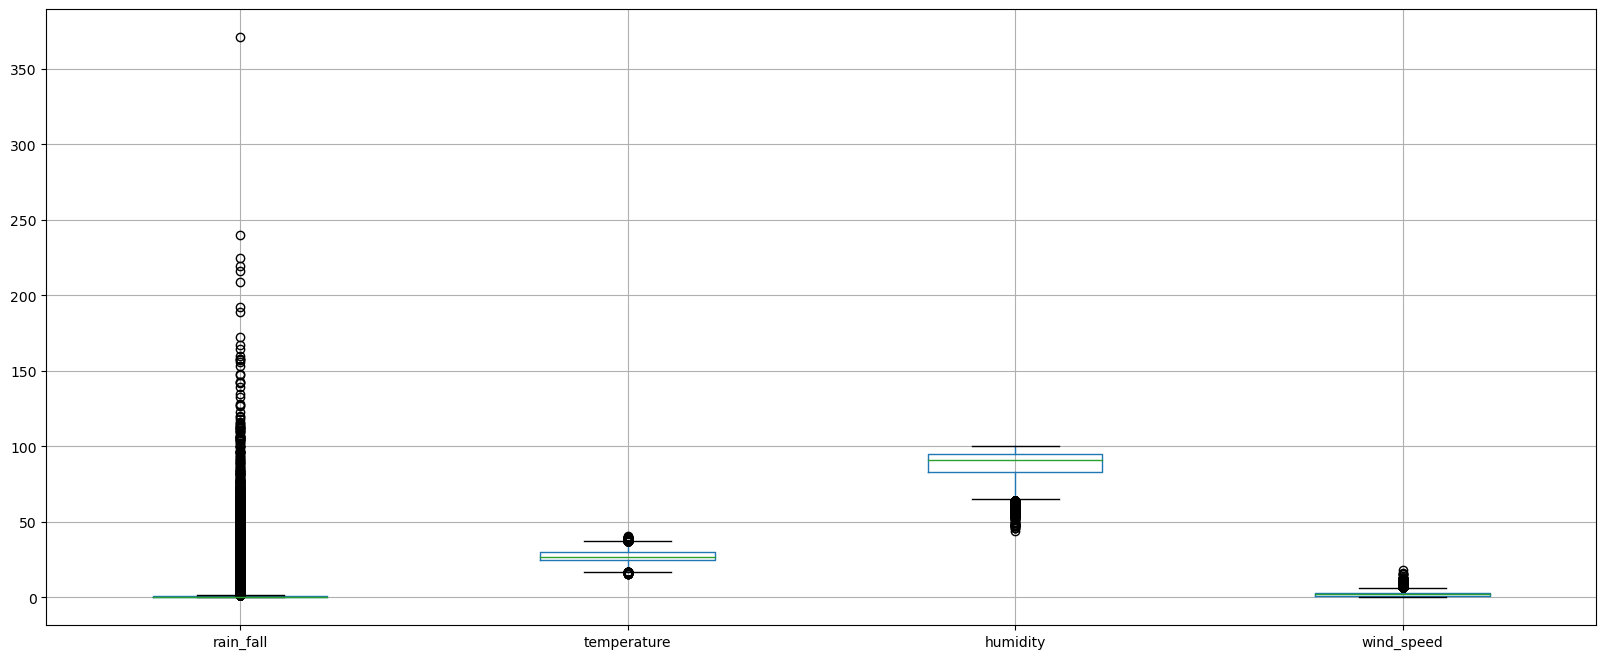

In [84]:
# Check for presence of outliers
plt.figure(figsize=(20,8))
df.boxplot()
plt.show()

Variable name : rain_fall


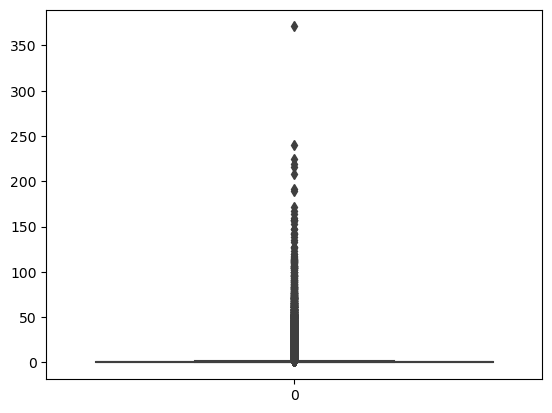

Variable name : temperature


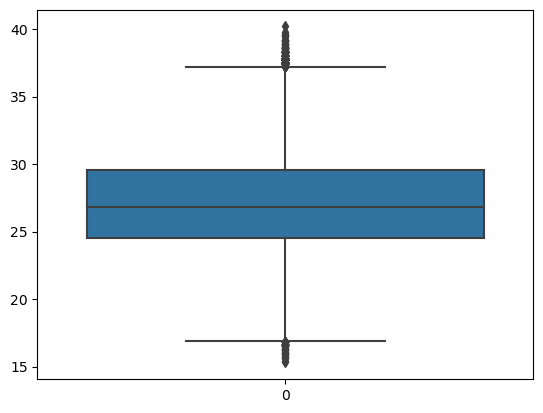

Variable name : humidity


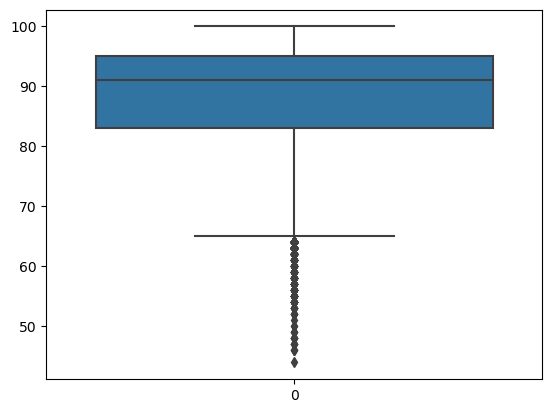

Variable name : wind_speed


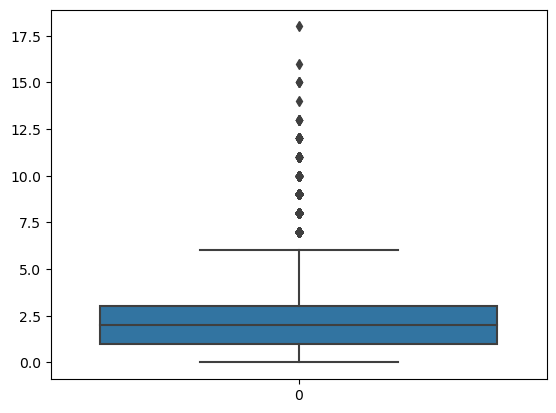

In [85]:
# Check for outliers using box plot for all numerical variable
for col in num_cols:
    print('Variable name :', col)
    sns.boxplot(df[col])
    plt.show()

In [86]:
# Check for presence of duplicate rows and drop it
df.drop_duplicates(inplace=True)

In [87]:
#df.select_dtypes(include=['object']).columns

In [88]:
# Impute categorical var with Mode
# df['datetime'] = df['datetime'].fillna(df['datetime'].mode()[0])
# df['station_name'] = df['station_name'].fillna(df['station_name'].mode()[0])
# df['wind_direction'] = df['wind_direction'].fillna(df['wind_direction'].mode()[0])

In [89]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# train_mice = df1.copy(deep=True)``

# mice_imputer = IterativeImputer()
# train_mice['rain_fall'] = mice_imputer.fit_transform(train_mice[['rain_fall']])

In [90]:
#train_mice['rain_fall'].isnull().sum()

In [91]:
# Remove Date column, because it is converted into date, month and year columns
# Converting Date variable into year, month and day columns

df['Year'] = pd.to_datetime(df['datetime']).dt.year
df['Month'] = pd.to_datetime(df['datetime']).dt.month
df['Day'] = pd.to_datetime(df['datetime']).dt.day
df['Hour'] = pd.to_datetime(df['datetime']).dt.hour

In [92]:
# Removing Date column
df.drop('datetime', axis=1, inplace=True)

In [93]:
# Convert location column into numerical using Labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['station_name'] = le.fit_transform(df['station_name']).astype('int32')
df['wind_direction'] = le.fit_transform(df['wind_direction']).astype('int32')

In [94]:
cols = ['station_name', 'wind_direction', 'Year', 'Month', 'Day', 'Hour']

In [95]:
df1 = df.copy(deep=True)

In [96]:
df1.drop(columns=cols, inplace=True, axis=1)

In [97]:
# Transform the dataset df1 using Powertransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

df1_pt = pd.DataFrame(pt.fit_transform(df1), columns=df1.columns)

In [98]:
# Add ordinal columns to trasformed dataset
df1_pt_ = pd.concat([df1_pt, df[cols]], axis=1)
df1_pt_.head(3)

,rain_fall,temperature,humidity,wind_speed,station_name,wind_direction,Year,Month,Day,Hour
0,0.713221,-1.037056,0.533886,0.958289,1,3,2016,1,15,0
1,-0.663966,-1.695385,0.729602,0.958289,1,3,2016,1,15,1
2,-0.663966,-1.965589,0.729602,0.958289,1,3,2016,1,15,2


Variable name : rain_fall


C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_14600\1122607288.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_pt[col])


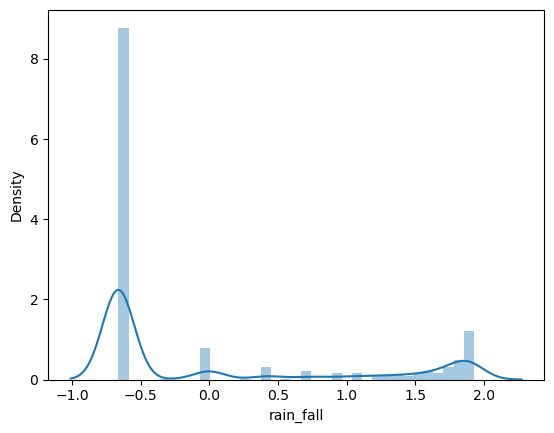

Variable name : temperature


C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_14600\1122607288.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_pt[col])


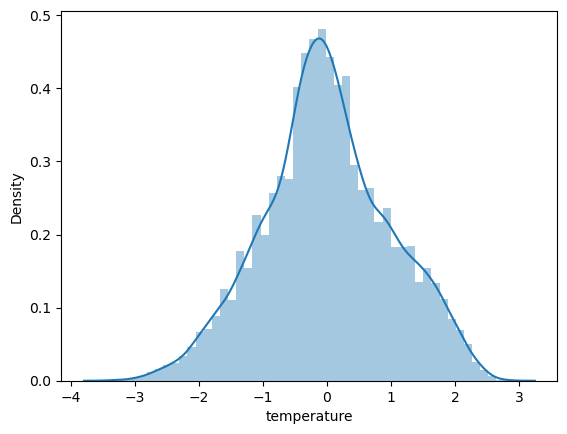

Variable name : humidity


C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_14600\1122607288.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_pt[col])


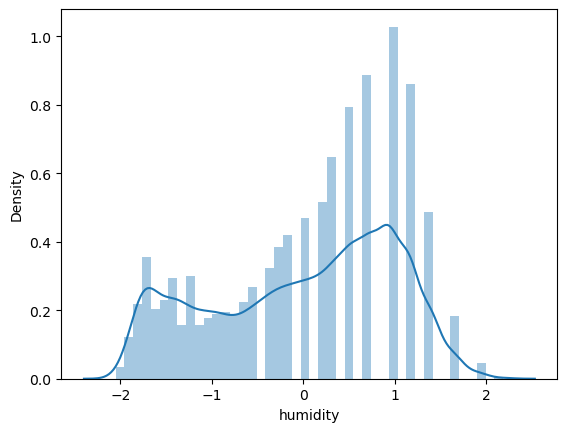

Variable name : wind_speed


C:\Users\Dung Nguyxn\AppData\Local\Temp\ipykernel_14600\1122607288.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_pt[col])


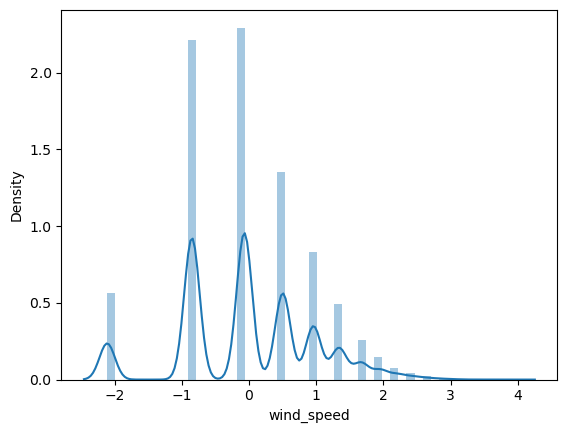

In [99]:
# Check for normality for transformed data
for col in df1_pt.columns:
    print('Variable name :', col)
    sns.distplot(df1_pt[col])
    plt.show()

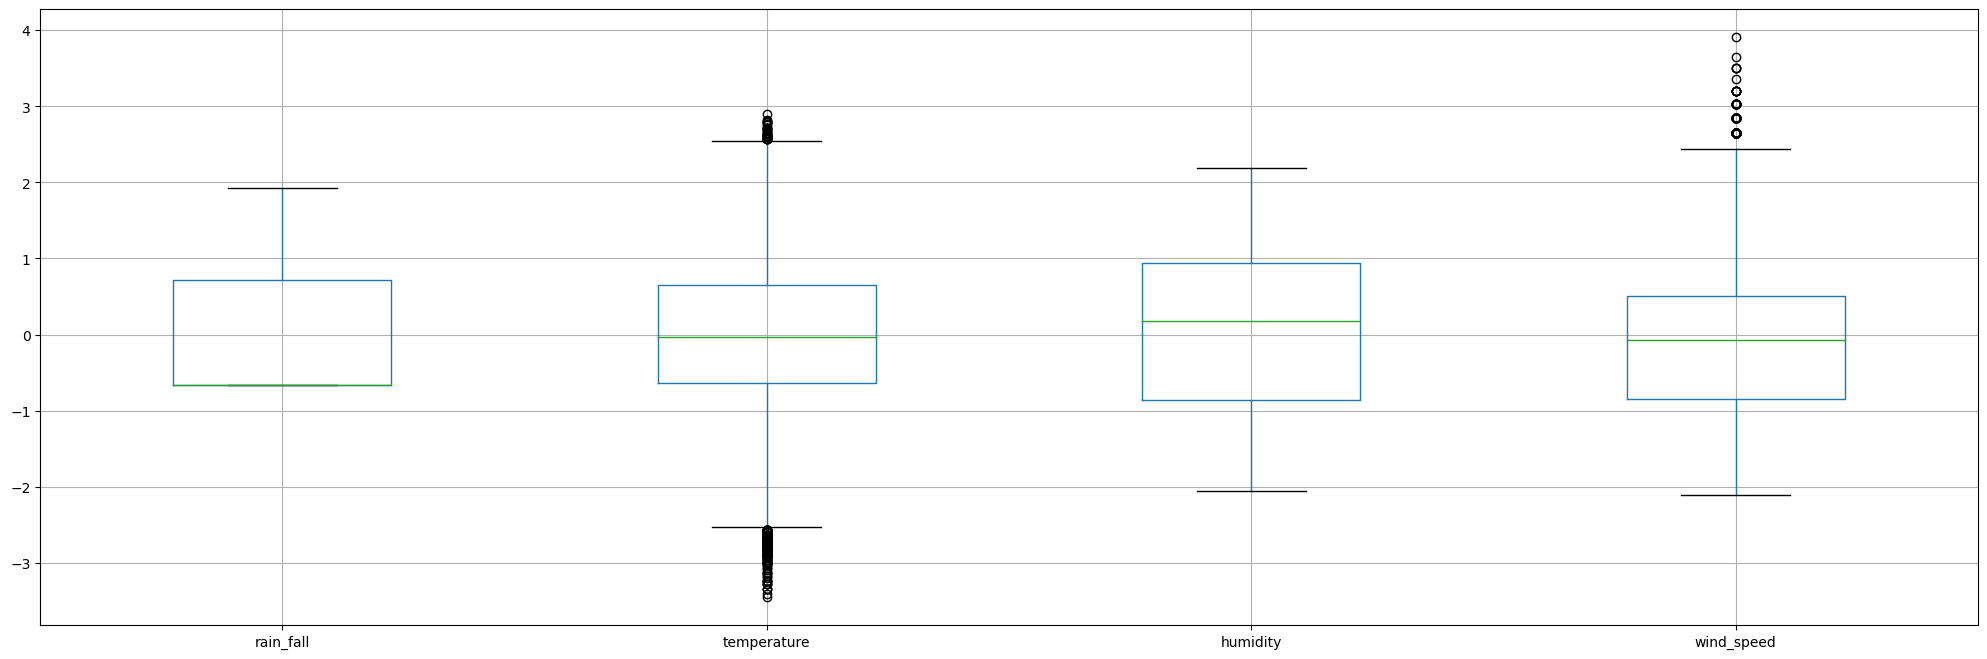

In [100]:
# Check for presence of outliers for transformed data
plt.figure(figsize=(25,8))
df1_pt.boxplot()
plt.show()

In [101]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lir = LinearRegression()

In [102]:
it = IterativeImputer(estimator=lir)
df2 = pd.DataFrame(it.fit_transform(df1_pt_), columns=df1_pt_.columns)

In [103]:
# Five point summary before imputation
df1_pt_.describe().T

,count,mean,std,min,25%,50%,75%,max
rain_fall,48067.0,-8.411151e-17,1.000010,-0.663966,-0.663966,-0.663966,0.713221,1.928096
temperature,49323.0,-3.607240e-16,1.000010,-3.447874,-0.629976,-0.035551,0.645613,2.902426
humidity,49323.0,2.529678e-16,1.000010,-2.054369,-0.864975,0.177257,0.937739,2.188299
wind_speed,49321.0,-1.070403e-16,1.000010,-2.109448,-0.848662,-0.069505,0.502839,3.906568
station_name,49323.0,1.000000e+00,0.816505,0.000000,0.000000,1.000000,2.000000,2.000000
wind_direction,49323.0,6.920321e+00,4.428150,0.000000,3.000000,7.000000,11.000000,14.000000
Year,49323.0,2.016486e+03,0.499814,2016.000000,2016.000000,2016.000000,2017.000000,2017.000000
Month,49323.0,6.378383e+00,3.266209,1.000000,4.000000,6.000000,9.000000,12.000000
Day,49323.0,1.587531e+01,8.778655,1.000000,8.000000,16.000000,23.000000,31.000000
Hour,49323.0,1.149930e+01,6.922627,0.000000,5.000000,11.000000,17.000000,23.000000


In [104]:
# Five point summary after imputation
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
rain_fall,49323.0,-2.789122e-04,0.987233,-0.663966,-0.663966,-0.663966,0.713221,1.928096
temperature,49323.0,-3.607240e-16,1.000010,-3.447874,-0.629976,-0.035551,0.645613,2.902426
humidity,49323.0,2.529678e-16,1.000010,-2.054369,-0.864975,0.177257,0.937739,2.188299
wind_speed,49323.0,-4.221482e-06,0.999990,-2.109448,-0.848662,-0.069505,0.502839,3.906568
station_name,49323.0,1.000000e+00,0.816505,0.000000,0.000000,1.000000,2.000000,2.000000
wind_direction,49323.0,6.920321e+00,4.428150,0.000000,3.000000,7.000000,11.000000,14.000000
Year,49323.0,2.016486e+03,0.499814,2016.000000,2016.000000,2016.000000,2017.000000,2017.000000
Month,49323.0,6.378383e+00,3.266209,1.000000,4.000000,6.000000,9.000000,12.000000
Day,49323.0,1.587531e+01,8.778655,1.000000,8.000000,16.000000,23.000000,31.000000
Hour,49323.0,1.149930e+01,6.922627,0.000000,5.000000,11.000000,17.000000,23.000000


In [105]:
# Null value for final modified dataset
df2.isnull().sum().sum()

0

In [106]:
df2.to_csv('EDA_Final_df2.csv')

In [107]:
df2.to_csv('EDA1_Final_df2.csv')

In [108]:
df3 = pd.read_csv('EDA1_Final_df2.csv')
df3.drop('Unnamed: 0', axis=1, inplace=True)

In [109]:
df3.head(2)

,rain_fall,temperature,humidity,wind_speed,station_name,wind_direction,Year,Month,Day,Hour
0,0.713221,-1.037056,0.533886,0.958289,1.0,3.0,2016.0,1.0,15.0,0.0
1,-0.663966,-1.695385,0.729602,0.958289,1.0,3.0,2016.0,1.0,15.0,1.0


In [110]:
# Import transformed data with without null values
df3 = pd.read_csv('EDA1_Final_df2.csv')

In [111]:
from sklearn.model_selection import train_test_split

# Split data as dependent and independent variables (x, y)
y = df3['rain_fall']
X = df3.drop('rain_fall', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Huấn luyện mô hình Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Huấn luyện mô hình Decision Tree
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Huấn luyện mô hình XGBoost
xg_reg = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)

# Huấn luyện mô hình CatBoost
cat_reg = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, loss_function='RMSE', verbose=0)
cat_reg.fit(X_train, y_train)
y_pred_cat = cat_reg.predict(X_test)

# Tính toán các chỉ số đánh giá
def evaluate_model(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2, rmse

# Đánh giá các mô hình
mse_rf, mae_rf, r2_rf, rmse_rf = evaluate_model(y_test, y_pred_rf)
mse_dt, mae_dt, r2_dt, rmse_dt = evaluate_model(y_test, y_pred_dt)
mse_xgb, mae_xgb, r2_xgb, rmse_xgb = evaluate_model(y_test, y_pred_xgb)
mse_cat, mae_cat, r2_cat, rmse_cat = evaluate_model(y_test, y_pred_cat)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}, RMSE:{rmse_rf}')
print(f'Decision Tree - MSE: {mse_dt}, MAE: {mae_dt}, R²: {r2_dt}, RMSE:{rmse_dt}')
print(f'XGBoost - MSE: {mse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}, RMSE:{rmse_xgb}')
print(f'CatBoost - MSE: {mse_cat}, MAE: {mae_cat}, R²: {r2_cat}, RMSE:{rmse_cat}')


Random Forest - MSE: 0.8802707546266642, MAE: 0.7639988943459524, R²: 0.1004768568503992, RMSE:0.9382274535669185
Decision Tree - MSE: 1.5766650574625318, MAE: 0.7966500216650798, R²: -0.6111482753784567, RMSE:0.9382274535669185
XGBoost - MSE: 0.9486311648449317, MAE: 0.8267986171798426, R²: 0.030621337121572445, RMSE:0.9382274535669185
CatBoost - MSE: 0.9551688475439266, MAE: 0.831277050089924, R²: 0.023940668861942793, RMSE:0.9382274535669185
